Embeddings de cada palabra (x):
 [[-1.5255959  -0.7502318  -0.6539809  -1.6094848  -0.10016718 -0.6091889
  -0.97977227 -1.6090963  -0.7121446   0.303722   -0.7773143  -0.25145525
  -0.22227049  1.6871134   0.22842517  0.4676355 ]
 [-0.6969724  -1.1607615   0.6995424   0.19908163  0.8656924   0.2444039
  -0.66291136  0.80730826  1.1016806  -0.17593604 -2.2455578  -1.446458
   0.06115528 -0.61774445 -0.79806983 -0.13162321]
 [ 1.8793458  -0.07213178  0.1577706  -0.7734549   0.1990565   0.04570278
   0.15295692 -0.4756788  -0.11101983  0.29273525 -0.15784515 -0.02878714
   2.357111   -1.0373387   1.5747981  -0.6298472 ]
 [-0.9273917   0.5451415   0.06628026 -0.43704012  0.7626006   0.44151092
   1.1651385   2.0153918   0.13741246  0.9386447  -0.18600109 -0.6446393
   1.5392458  -0.8695876  -3.3311536  -0.74787223]
 [-0.02550246 -1.0233306  -0.59618515 -1.0055307  -0.2106063  -0.00754753
   1.6734272   0.01034283 -0.70395666 -0.1852658  -0.9962351  -0.83125526
  -0.46102202 -0.56008244  0

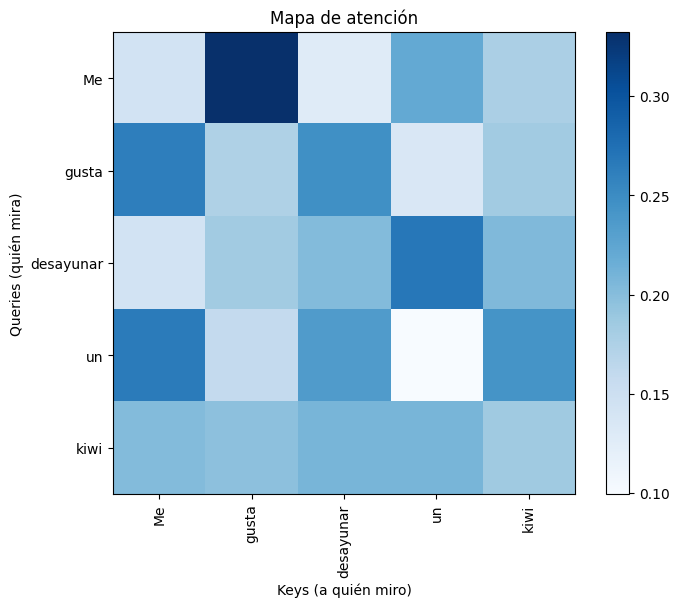

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd

torch.manual_seed(1)

# --- Frase ---
sentence = "Me gusta desayunar un kiwi".split()
vocab = {w: i for i, w in enumerate(sentence)}
indices = torch.tensor([vocab[w] for w in sentence])  # [seq_len]

# --- Embeddings ---
embedding_dim = 16
embed = nn.Embedding(len(vocab), embedding_dim)
x = embed(indices)  # [seq_len, embedding_dim]

print("Embeddings de cada palabra (x):\n", x.detach().numpy())

# --- Proyecciones Q, K, V ---
d_k = embedding_dim
W_q = nn.Linear(d_k, d_k, bias=False)
W_k = nn.Linear(d_k, d_k, bias=False)
W_v = nn.Linear(d_k, d_k, bias=False)

# Imprimir matrices de pesos
print("\nMatriz de pesos W_q:\n", W_q.weight.detach().numpy())
print("\nMatriz de pesos W_k:\n", W_k.weight.detach().numpy())
print("\nMatriz de pesos W_v:\n", W_v.weight.detach().numpy())

Q = W_q(x)
K = W_k(x)
V = W_v(x)

# --- Atención ---
scores = Q @ K.T  # Producto QK sin escalado
print("\nValores de la matriz QK (producto punto):\n", scores.detach().numpy())

# Escalado y softmax para obtener pesos de atención
scores_scaled = scores / (d_k ** 0.5)
attn_weights = F.softmax(scores_scaled, dim=-1)  # [seq_len, seq_len]
output = attn_weights @ V

# --- Mostrar valores como tabla ---
df = pd.DataFrame(attn_weights.detach().numpy(),
                  index=sentence, columns=sentence)

df_rounded = df.round(2)
print("\nPesos de atención (cada fila = query, cada columna = key):\n")
print(df_rounded)

# --- Visualización ---
plt.figure(figsize=(8, 6))
plt.imshow(attn_weights.detach().numpy(), cmap="Blues")
plt.colorbar()
plt.xticks(range(len(sentence)), sentence, rotation=90)
plt.yticks(range(len(sentence)), sentence)
plt.title("Mapa de atención")
plt.xlabel("Keys (a quién miro)")
plt.ylabel("Queries (quién mira)")
plt.show()